In [6]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("Plots")



   Resolving package versions...
   Installed InvertedIndices ──── v1.3.1
   Installed Missings ─────────── v1.2.0
   Installed Crayons ──────────── v4.1.1
   Installed StringManipulation ─ v0.4.1
   Installed DataStructures ───── v0.18.22
   Installed SortingAlgorithms ── v1.2.1
   Installed PrettyTables ─────── v2.4.0
   Installed DataFrames ───────── v1.7.0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [a93c6f00] + DataFrames v1.7.0
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.7.0
  [864edb3b] + DataStructures v0.18.22
  [41ab1584] + InvertedIndices v1.3.1
  [e1d29d7a] + Missings v1.2.0
  [08abe8d2] + PrettyTables v2.4.0
  [a2af1166] + SortingAlgorithms v1.2.1
  [892a3eda] + StringManipulation v0.4.1
Precompiling project...
   1659.3 ms  ✓ InvertedIndices
   1437.3 ms  ✓ Missings
   3838.0 ms  ✓ Crayons
   4272.5 ms  ✓ DataStructures
   4311.5 ms  ✓ StringManipulation
   1037.6 ms  ✓ SortingAlgorithms

In [7]:
#Loading packages
using PlotlyJS, CSV, DataFrames, Plots

In [ ]:
#Setting the working directory
#cd("d:/My Drive/Sciences Po/Spring 2025/Labor Market in Practice/Midterm/Labor-with-Moshe")
cd("/Users/liminglin/我的云端硬盘 (liminglin1998@gmail.com)/Sciences Po/Spring 2025/Labor Market in Practice/Midterm/Labor-with-Moshe")

In [10]:
# Load the overview data (national by year)
df_overview = CSV.read("Data/Annual Data.csv", DataFrame)

Row,Year,Population at Year End,Male Population,Female Population,Urban Population,Rural Population,Labor Force,Employed Persons,Primary Industry,Secondary Industry,Tertiary Industry,Urban Employed Persons,Rural Employed Persons,Number of Employed Persons in Urban Non-private Units,Number of registered unemployed in urban areas,Registered urban unemployment rate (%),Employed by Private Enterprises in Rural Areas,Self-Employed in Rural Areas
,Int64,Int64,Int64,Int64,Int64,Int64,Int64?,Int64,Int64?,Int64?,Int64?,Int64,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?
1,2000,126743,65437,61306,45906,80837,73992,72085,36043,16219,19823,23151,48934,11612,595,3.1,1139,2934
2,2001,127627,65672,61955,48064,79563,73884,72797,36399,16234,20165,24123,48674,11166,681,3.6,1187,2629
3,2002,128453,66115,62338,50212,78241,74492,73280,36640,15682,20958,25159,48121,10985,770,4.0,1411,2474
4,2003,129227,66556,62671,52376,76851,74911,73736,36204,15927,21605,26230,47506,10970,800,4.3,1754,2260
5,2004,129988,66976,63012,54283,75705,75290,74264,34830,16709,22725,27293,46971,11099,827,4.2,2024,2066
6,2005,130756,67375,63381,56212,74544,76120,74647,33442,17766,23439,28389,46258,11404,839,4.2,2366,2123
7,2006,131448,67728,63720,58288,73160,76315,74978,31941,18894,24143,29630,45348,11713,847,4.1,2632,2147
8,2007,132129,68048,64081,60633,71496,76531,75321,30731,20186,24404,30953,44368,12024,830,4.0,2672,2187
9,2008,132802,68357,64445,62403,70399,77046,75564,29923,20553,25087,32103,43461,12193,886,4.2,2780,2167


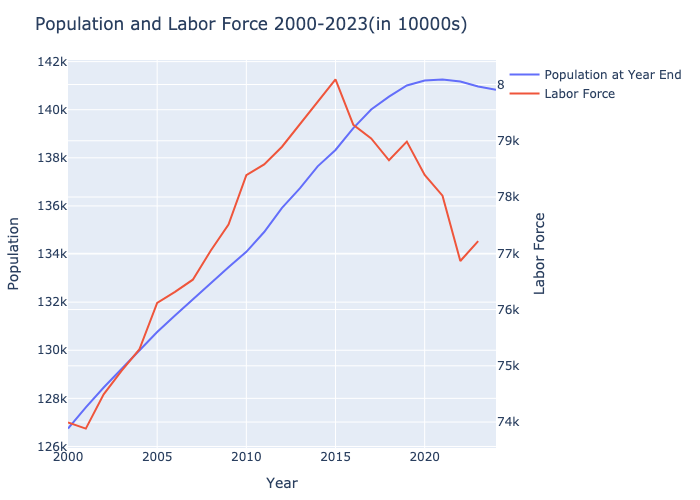

In [ ]:
# Population and Labor Force from 2000-2023
#selected_years = 2000:2023
#df_subset_1 = filter(row -> row."Year" in selected_years, df_overview)
pop_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Population at Year End",
    mode = "lines",
    name = "Population at Year End",
    yaxis = "y"   # primary y-axis
)
lf_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Labor Force",
    mode = "lines",
    name = "Labor Force",
    yaxis = "y2"  # secondary y-axis
)
layout1 = PlotlyJS.Layout(
    title = "Population and Labor Force 2000-2023(in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Population"),
    yaxis2 = PlotlyJS.attr(
        title = "Labor Force",
        overlaying = "y",  # overlay on the primary y-axis
        side = "right"     # position on the right
    ),
)
pop_labor_graph = PlotlyJS.plot([pop_line, lf_line], layout1)
display(pop_labor_graph)

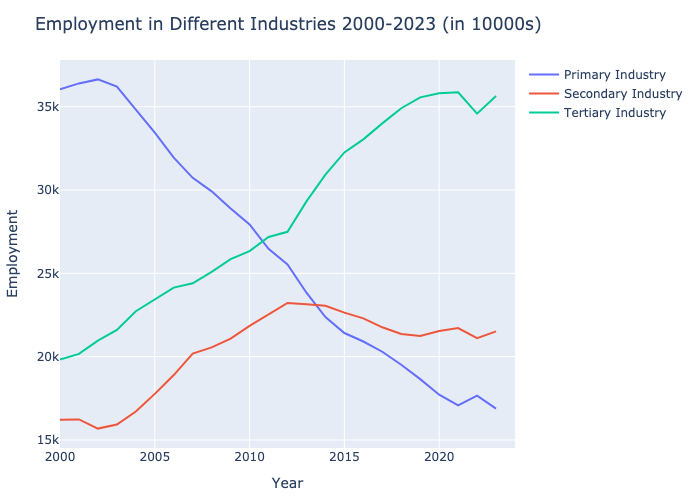

In [12]:
#Evolution of Employment in Different Sectors
pi_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Primary Industry",
    mode = "lines",
    name = "Primary Industry",
    yaxis = "y"   # primary y-axis
)
si_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Secondary Industry",
    mode = "lines",
    name = "Secondary Industry",
    yaxis = "y"   # primary y-axis
)
ti_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Tertiary Industry",
    mode = "lines",
    name = "Tertiary Industry",
    yaxis = "y"   # primary y-axis
)
layout2 = PlotlyJS.Layout(
    title = "Employment in Different Industries 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([pi_line, si_line, ti_line], layout2))

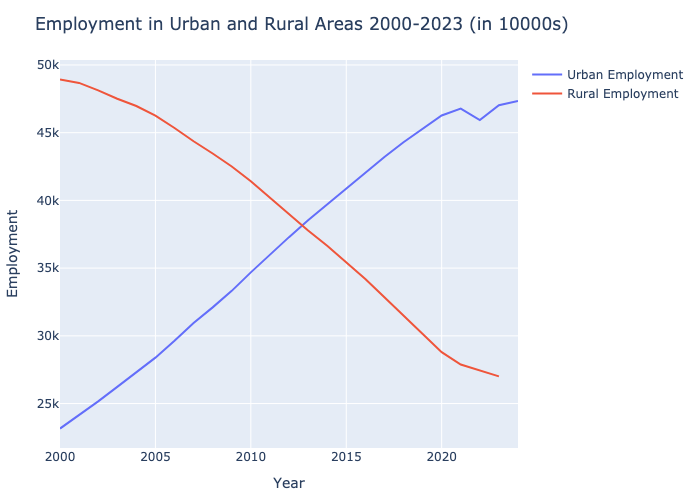

In [13]:
#Evolution of Employment in Urban and Rural Areas
urban_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Employed Persons",
    mode = "lines",
    name = "Urban Employment",
    yaxis = "y"   # primary y-axis
)
rural_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Employed Persons",
    mode = "lines",
    name = "Rural Employment",
    yaxis = "y"   # primary y-axis
)
layout3 = PlotlyJS.Layout(
    title = "Employment in Urban and Rural Areas 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([urban_line, rural_line], layout3))

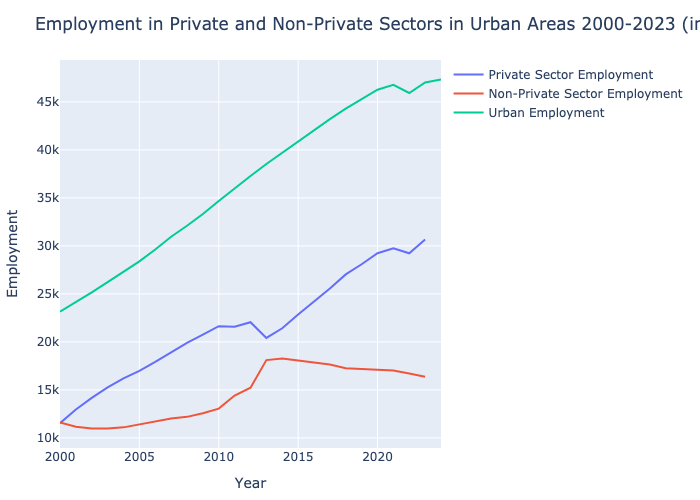

In [20]:
#Comparing Private and Non-Private Sector Employment in Urban Areas
df_overview."Urban Private Sector Employment" = df_overview."Urban Employed Persons" .- df_overview."Number of Employed Persons in Urban Non-private Units"
private_urban_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Private Sector Employment",
    mode = "lines",
    name = "Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
non_private_urban_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Number of Employed Persons in Urban Non-private Units",
    mode = "lines",
    name = "Non-Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
layout4 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Urban Areas 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_urban_line, non_private_urban_line, urban_line], layout4))

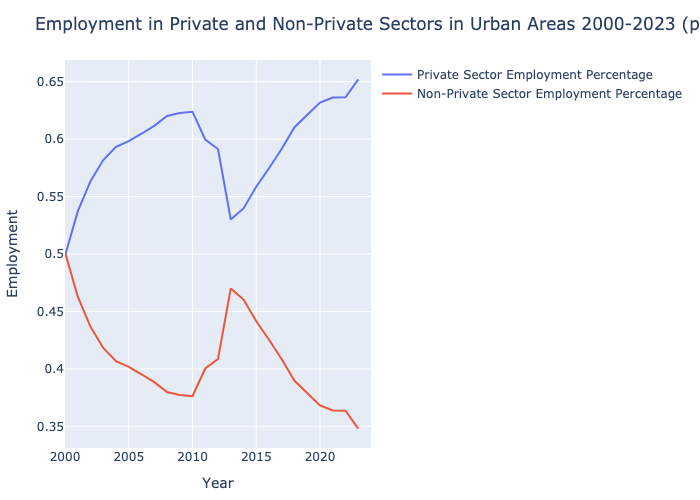

In [16]:
#Comparing Private and Non-Private Sector Employment in Urban Areas (percentage)
df_overview."Urban Private Sector Employment Percentage" = df_overview."Urban Private Sector Employment" ./ df_overview."Urban Employed Persons"
df_overview."Urban Non-Private Sector Employment Percentage" = df_overview."Number of Employed Persons in Urban Non-private Units" ./ df_overview."Urban Employed Persons"
private_urban_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Private Sector Employment Percentage",
    mode = "lines",
    name = "Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
non_private_urban_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Urban Non-Private Sector Employment Percentage",
    mode = "lines",
    name = "Non-Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
layout5 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Urban Areas 2000-2023 (percentage)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_urban_line_percentage, non_private_urban_line_percentage], layout5))

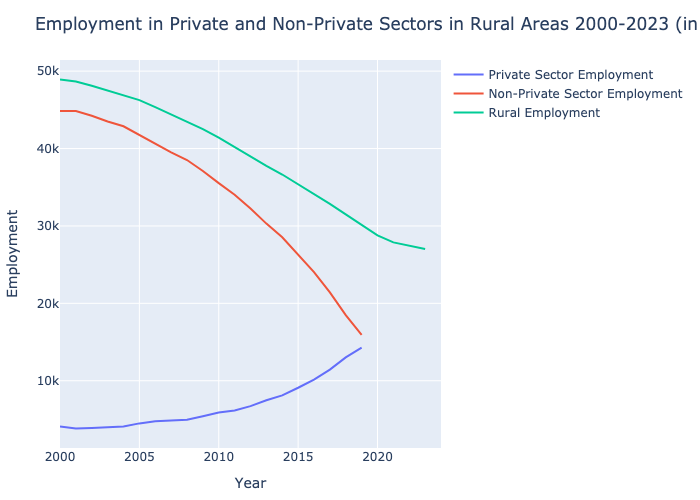

In [19]:
#Comparing Private and Non-Private Sector Employment in Rural Areas
df_overview."Rural Private Sector Employment" = df_overview."Employed by Private Enterprises in Rural Areas" .+ df_overview."Self-Employed in Rural Areas"
df_overview."Rural Non-Private Sector Employment" = df_overview."Rural Employed Persons" .- df_overview."Rural Private Sector Employment"
private_rural_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Private Sector Employment",
    mode = "lines",
    name = "Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
non_private_rural_line = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Non-Private Sector Employment",
    mode = "lines",
    name = "Non-Private Sector Employment",
    yaxis = "y"   # primary y-axis
)
layout6 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Rural Areas 2000-2023 (in 10000s)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_rural_line, non_private_rural_line, rural_line], layout6))

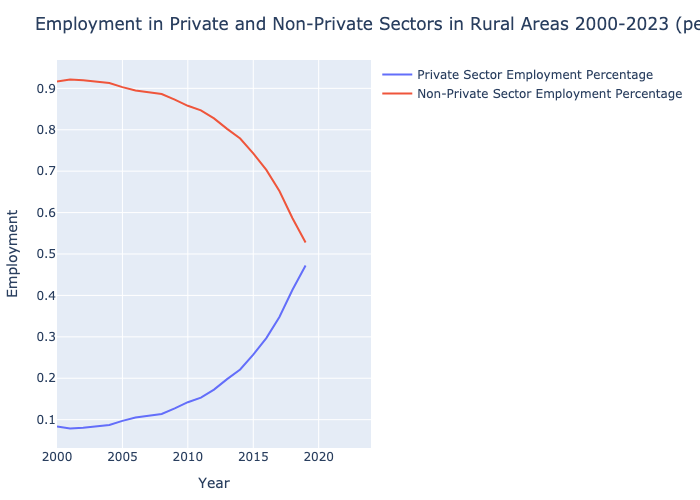

In [18]:
#Comparing Private and Non-Private Sector Employment in Rural Areas (percentage)
df_overview."Rural Private Sector Employment Percentage" = df_overview."Rural Private Sector Employment" ./ df_overview."Rural Employed Persons"
df_overview."Rural Non-Private Sector Employment Percentage" = df_overview."Rural Non-Private Sector Employment" ./ df_overview."Rural Employed Persons"
private_rural_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Private Sector Employment Percentage",
    mode = "lines",
    name = "Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
non_private_rural_line_percentage = PlotlyJS.scatter(
    x = df_overview."Year",
    y = df_overview."Rural Non-Private Sector Employment Percentage",
    mode = "lines",
    name = "Non-Private Sector Employment Percentage",
    yaxis = "y"   # primary y-axis
)
layout7 = PlotlyJS.Layout(
    title = "Employment in Private and Non-Private Sectors in Rural Areas 2000-2023 (percentage)",
    xaxis = PlotlyJS.attr(title = "Year"),
    yaxis = PlotlyJS.attr(title = "Employment"),
)
display(PlotlyJS.plot([private_rural_line_percentage, non_private_rural_line_percentage], layout7))